<a href="https://colab.research.google.com/github/milly-lauren/aiHW2/blob/problem2/hw2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST FASHION ITEMS

**Load and Format The Data**

In [0]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

**Build Underfit Model**

The train_images number is reduced. Now the model doesn't see that much data so it does not train well.

It only goes through two layers before the final vector.

The train and test accuracy are very low.

In [0]:
from sklearn.model_selection import train_test_split

under_train_images = train_images
under_train_labels = train_labels
under_test_images = test_images
under_test_labels = test_labels
x = np.concatenate((under_train_images, under_test_images))
y = np.concatenate((under_train_labels, under_test_labels))

train_size = 0.4
under_train_images, under_test_images, under_train_labels, under_test_labels = train_test_split(x, y, train_size=train_size, random_state=0)

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(2, activation = tf.nn.relu),
    keras.layers.Dense(3, activation = tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 5
history = model.fit(under_train_images, 
                      under_train_labels, 
                      epochs=epochs,  
                      validation_data=(under_test_images, under_test_labels))

Train on 28000 samples, validate on 42000 samples
Epoch 1/5
28000/28000 [==============================] - 4s 131us/sample - loss: 2.0754 - acc: 0.1777 - val_loss: 1.9013 - val_acc: 0.2295
Epoch 2/5
28000/28000 [==============================] - 3s 118us/sample - loss: 1.7938 - acc: 0.2483 - val_loss: 1.7185 - val_acc: 0.2722
Epoch 3/5
28000/28000 [==============================] - 3s 119us/sample - loss: 1.6739 - acc: 0.2834 - val_loss: 1.6403 - val_acc: 0.3031
Epoch 4/5
28000/28000 [==============================] - 3s 120us/sample - loss: 1.6103 - acc: 0.3246 - val_loss: 1.5933 - val_acc: 0.3586
Epoch 5/5
28000/28000 [==============================] - 3s 120us/sample - loss: 1.5679 - acc: 0.3651 - val_loss: 1.5634 - val_acc: 0.3662


*Accuracy*

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 37us/sample - loss: 1.5634 - acc: 0.3730
Test accuracy: 0.373


In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

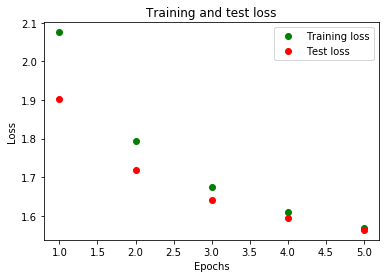

In [0]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(epochs_range, loss_values, 'go', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

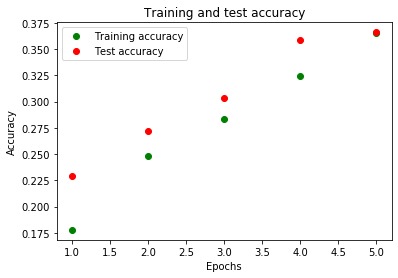

In [0]:
plt.plot(epochs_range, acc_values, 'go', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Build Overfit Model** 

When the accuracy drops when new data is introduced

More hidden layers to complicate the NN, also the original train_image size is used here on out.

Significant gap between training accuracy and validation (~6%) when tested.

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(20, activation = tf.nn.relu),
    keras.layers.Dense(16, activation = tf.nn.relu),
    keras.layers.Dense(14, activation = tf.nn.relu),
    keras.layers.Dense(12, activation = tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 12
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 83us/sample - loss: 0.6526 - acc: 0.7626 - val_loss: 0.4800 - val_acc: 0.8271
Epoch 2/12
60000/60000 [==============================] - 5s 75us/sample - loss: 0.4365 - acc: 0.8427 - val_loss: 0.4434 - val_acc: 0.8417
Epoch 3/12
60000/60000 [==============================] - 4s 74us/sample - loss: 0.4006 - acc: 0.8559 - val_loss: 0.4515 - val_acc: 0.8385
Epoch 4/12
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3773 - acc: 0.8639 - val_loss: 0.4068 - val_acc: 0.8526
Epoch 5/12
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3636 - acc: 0.8682 - val_loss: 0.4110 - val_acc: 0.8523
Epoch 6/12
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3530 - acc: 0.8730 - val_loss: 0.3908 - val_acc: 0.8580
Epoch 7/12
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3436 - acc: 0.8750 - val_loss: 0.

*Accuracy*

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 46us/sample - loss: 0.4125 - acc: 0.8566
Test accuracy: 0.8566


In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

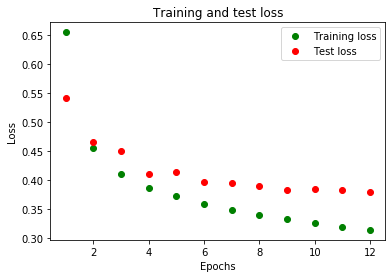

In [0]:
plt.plot(epochs_range, loss_values, 'go', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

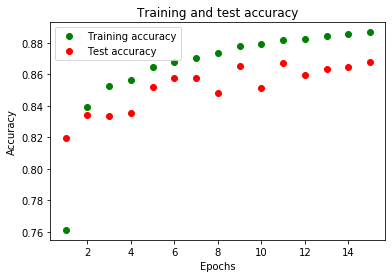

In [0]:
plt.plot(epochs_range, acc_values, 'go', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Build "Pretty Good" Model**

Add drop out to fight overfitting. 

Data for training and testing is pretty close except for the first two epochs. When tested the train accuracy is 86.81% and the test accuracy is 86.51%, both performing about the same for predicitions. 

In [0]:
rate = 0.1

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(40, activation = tf.nn.relu),
    keras.layers.Dropout(rate),
    keras.layers.Dense(20, activation = tf.nn.relu),
    keras.layers.Dropout(rate),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 8
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 6s 101us/sample - loss: 0.6674 - acc: 0.7653 - val_loss: 0.4655 - val_acc: 0.8300
Epoch 2/8
60000/60000 [==============================] - 5s 91us/sample - loss: 0.4685 - acc: 0.8331 - val_loss: 0.4218 - val_acc: 0.8509
Epoch 3/8
60000/60000 [==============================] - 6s 92us/sample - loss: 0.4295 - acc: 0.8456 - val_loss: 0.4077 - val_acc: 0.8534
Epoch 4/8
60000/60000 [==============================] - 6s 105us/sample - loss: 0.4086 - acc: 0.8537 - val_loss: 0.4177 - val_acc: 0.8513
Epoch 5/8
60000/60000 [==============================] - 6s 101us/sample - loss: 0.3926 - acc: 0.8592 - val_loss: 0.4016 - val_acc: 0.8557
Epoch 6/8
60000/60000 [==============================] - 6s 100us/sample - loss: 0.3797 - acc: 0.8633 - val_loss: 0.3824 - val_acc: 0.8644
Epoch 7/8
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3694 - acc: 0.8664 - val_loss: 0.380

*Accuracy*

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 53us/sample - loss: 0.3818 - acc: 0.8651
Test accuracy: 0.8651


In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

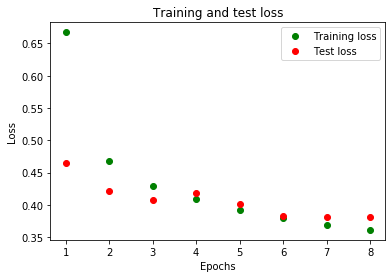

In [0]:
plt.plot(epochs_range, loss_values, 'go', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

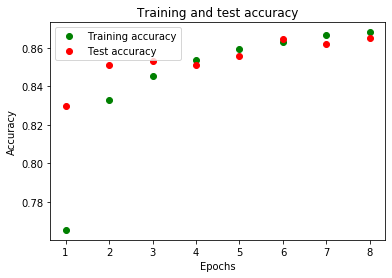

In [0]:
plt.plot(epochs_range, acc_values, 'go', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()